In [4]:
import numpy as np

In [5]:
X = 2 * np.random.rand(100, 1)

In [6]:
X

array([[0.03016353],
       [1.48015386],
       [0.6756976 ],
       [0.92970565],
       [1.84447414],
       [1.57214961],
       [0.12010924],
       [0.29704166],
       [1.05213868],
       [1.0212771 ],
       [0.39613494],
       [0.78969816],
       [0.48417042],
       [1.99347282],
       [1.13912395],
       [0.31893685],
       [0.08443728],
       [0.3674642 ],
       [1.41753402],
       [0.78751766],
       [1.89002485],
       [0.96332765],
       [1.64263199],
       [0.09594025],
       [0.49877504],
       [0.34665061],
       [1.66762545],
       [0.15412118],
       [1.54830118],
       [0.52645553],
       [1.75401078],
       [1.0410225 ],
       [0.7748919 ],
       [0.23800031],
       [0.95635572],
       [0.1101659 ],
       [0.76370384],
       [0.57586174],
       [1.47962946],
       [0.0544295 ],
       [1.95317745],
       [0.32021127],
       [0.09923937],
       [0.46202726],
       [1.8640895 ],
       [0.49075309],
       [0.3002085 ],
       [1.834

In [7]:
X.shape

(100, 1)

In [8]:
y = 4 + 3*X + np.random.randn(100, 1)

In [41]:
y

array([[ 5.28107369],
       [ 8.41363886],
       [ 6.89861248],
       [ 7.77571695],
       [10.08791155],
       [ 9.82763517],
       [ 3.61734513],
       [ 4.7519909 ],
       [ 7.55592877],
       [ 7.76653405],
       [ 4.38931114],
       [ 7.96604806],
       [ 5.70148452],
       [ 9.70205109],
       [ 5.69042056],
       [ 4.35058974],
       [ 4.36520065],
       [ 5.67861422],
       [ 8.48456018],
       [ 8.22725763],
       [ 8.95989549],
       [ 6.08616855],
       [ 9.33191198],
       [ 3.11270414],
       [ 5.28017855],
       [ 5.77061636],
       [ 9.68956702],
       [ 5.44337064],
       [ 7.99895482],
       [ 5.86537302],
       [10.96438576],
       [ 7.7461138 ],
       [ 6.17875063],
       [ 4.25641196],
       [ 6.9622705 ],
       [ 3.46643746],
       [ 5.39528681],
       [ 4.51224611],
       [ 8.42395278],
       [ 4.36955962],
       [ 8.74385749],
       [ 6.39176454],
       [ 4.51617194],
       [ 6.74184772],
       [ 9.78540035],
       [ 4

In [42]:
y.shape

(100, 1)

In [9]:
import matplotlib.pyplot as plt

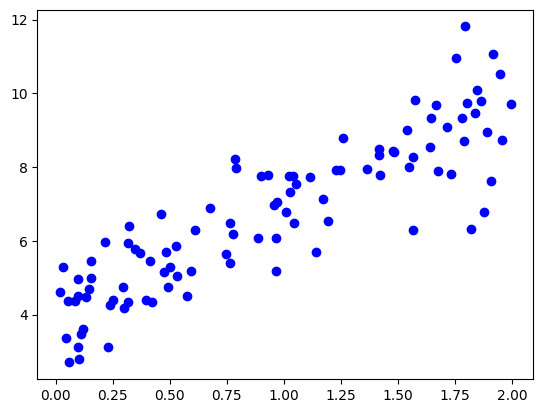

In [10]:
plt.plot(X, y, "bo")

In [11]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance

In [12]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
theta_best

array([[4.03076653],
       [2.86889211]])

In [14]:
X_new = np.array([[0], [2]])

In [15]:
X_new

array([[0],
       [2]])

In [16]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [17]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [18]:
y_predict = X_new_b.dot(theta_best)

In [19]:
y_predict

array([[4.03076653],
       [9.76855075]])

(np.float64(0.0), np.float64(2.0), np.float64(0.0), np.float64(15.0))

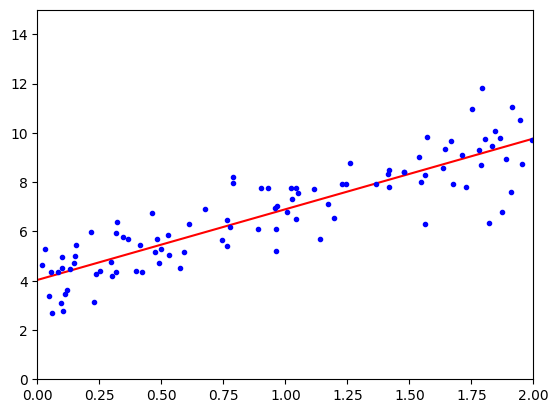

In [20]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [22]:
lin_reg.intercept_, lin_reg.coef_

(array([4.03076653]), array([[2.86889211]]))

In [23]:
lin_reg.predict(X_new)

array([[4.03076653],
       [9.76855075]])

In [24]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

In [25]:
theta_best_svd

array([[4.03076653],
       [2.86889211]])

In [26]:
np.linalg.pinv(X_b).dot(y)

array([[4.03076653],
       [2.86889211]])

## Gradient Descent

In [27]:
eta = 0.1
n_iterations = 1000
m = 100

In [28]:
theta = np.random.randn(2,1)

In [29]:
theta

array([[-0.06382692],
       [-0.97945234]])

In [30]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [31]:
theta

array([[4.03076653],
       [2.86889211]])

## Stochastic Gradient Descent

In [32]:
n_epochs = 50
t0, t1 = 5, 50

In [33]:
def learning_schedule(t):
    return t0/ (t+t1)

In [34]:
theta = np.random.randn(2,1)

In [35]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

In [36]:
theta

array([[4.00972333],
       [2.87130517]])

In [37]:
from sklearn.linear_model import SGDRegressor

In [38]:
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0=0.1)

In [39]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [40]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01459457]), array([2.85346798]))